In [1]:
import numpy as np 
import pandas as pd 
from pandas import DataFrame 

import matplotlib.pyplot as plt 
import seaborn as sns
import itertools
%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic' 
plt.rcParams["font.size"] = 10
%matplotlib inline 


from datetime import datetime, timedelta 
from statsmodels.tsa.arima_model import ARIMA 

from sklearn.preprocessing import StandardScaler
import os

In [2]:
test = pd.read_csv("data/TEST_DHweightDaconArima_NAFilled.csv")
train = pd.read_csv("data/TRAIN_DHweightDaconArima_NAFilled.csv")

In [3]:
train.Time = pd.to_datetime(train.Time)
test.Time = pd.to_datetime(test.Time)

In [4]:
traintest = pd.merge(train, test, on ='Time', how = 'outer')
traintest

Time      X692     X1272      X553     X1299      X598  \
0    2018-02-15 00:00:00  0.150000  0.392000  0.181000  0.237000  0.064000   
1    2018-02-15 01:00:00  0.422000  0.873000  0.502000  0.356000  0.160000   
2    2018-02-15 02:00:00  0.314000  0.440000  0.461000  0.308000  0.174000   
3    2018-02-15 03:00:00  0.309000  0.292000  0.524000  0.279000  0.198000   
4    2018-02-15 04:00:00  0.327000  0.298000  0.486000  0.364000  0.155000   
5    2018-02-15 05:00:00  0.303000  0.254000  0.514000  0.953000  0.198000   
6    2018-02-15 06:00:00  0.273000  0.290000  0.486000  0.547000  0.153000   
7    2018-02-15 07:00:00  0.798000  0.377000  0.506000  0.538000  0.222000   
8    2018-02-15 08:00:00  0.497000  0.247000  0.721000  0.529000  0.277000   
9    2018-02-15 09:00:00  0.428000  0.272000  0.397000  0.595000  0.381000   
10   2018-02-15 10:00:00  0.357000  0.257000  0.440000  0.492000  0.461000   
11   2018-02-15 11:00:00  0.387000  0.276000  0.426000  0.532000  0.265000   
12   2018-02-15 12:00:00  0.360000  0.277000  0.477000  0.351000  0.293000   
13   2018-02-15 13:00:00  0.333000  0.281000  0.432000  0.335000  0.255000   
14   2018-02-15 14:00:00  0.350000  0.257000  0.468000  0.298000  0.443000   
15   2018-02-15 15:00:00  0.751000  0.262000  0.427000  0.295000  0.462000   
16   2018-02-15 16:00:00  1.499000  0.260000  0.438000  0.278000  0.348000   
17   2018-02-15 17:00:00  1.339000  0.241000  0.414000  0.328000  0.192000   
18   2018-02-15 18:00:00  1.241000  0.267000  0.588000  0.277000  0.146000   
19   2018-02-15 19:00:00  0.741000  0.253000  0.708000  0.359000  0.138000   
20   2018-02-15 20:00:00  0.226000  0.088000  0.313000  0.234000  0.062000   
21   2018-02-15 21:00:00  0.470000  0.250000  0.779000  0.591000  0.131000   
22   2018-02-15 22:00:00  0.188429  0.179294  0.342936  0.267831  0.150000   
23   2018-02-15 23:00:00  0.178571  0.168706  0.292064  0.247169  0.261125   
24   2018-02-16 00:00:00  0.156000  0.118000  0.189000  0.153000  0.188000   
25   2018-02-16 01:00:00  0.317000  0.264000  0.536000  0.381000  0.271000   
26   2018-02-16 02:00:00  0.298000  0.323000  0.407000  0.381000  0.251000   
27   2018-02-16 03:00:00  0.335000  0.265000  0.488000  0.193000  0.258000   
28   2018-02-16 04:00:00  0.356000  0.256000  0.412000  0.165000  0.164000   
29   2018-02-16 05:00:00  0.308000  0.302000  0.419000  0.175000  0.169000   
...                  ...       ...       ...       ...       ...       ...   
7304 2018-06-16 20:00:00       NaN       NaN       NaN       NaN       NaN   
7305 2018-06-16 21:00:00       NaN       NaN       NaN       NaN       NaN   
7306 2018-06-16 22:00:00       NaN       NaN       NaN       NaN       NaN   
7307 2018-06-16 23:00:00       NaN       NaN       NaN       NaN       NaN   
7308 2018-06-17 01:00:00       NaN       NaN       NaN       NaN       NaN   
7309 2018-06-17 02:00:00       NaN       NaN       NaN       NaN       NaN   
7310 2018-06-17 03:00:00       NaN       NaN       NaN       NaN       NaN   
7311 2018-06-17 04:00:00       NaN       NaN       NaN       NaN       NaN   
7312 2018-06-17 05:00:00       NaN       NaN       NaN       NaN       NaN   
7313 2018-06-17 06:00:00       NaN       NaN       NaN       NaN       NaN   
7314 2018-06-17 07:00:00       NaN       NaN       NaN       NaN       NaN   
7315 2018-06-17 08:00:00       NaN       NaN       NaN       NaN       NaN   
7316 2018-06-17 09:00:00       NaN       NaN       NaN       NaN       NaN   
7317 2018-06-17 10:00:00       NaN       NaN       NaN       NaN       NaN   
7318 2018-06-17 11:00:00       NaN       NaN       NaN       NaN       NaN   
7319 2018-06-17 12:00:00       NaN       NaN       NaN       NaN       NaN   
7320 2018-06-17 13:00:00       NaN       NaN       NaN       NaN       NaN   
7321 2018-06-17 14:00:00       NaN       NaN       NaN       NaN       NaN   
7322 2018-06-17 15:00:00       NaN       NaN       NaN       NaN       NaN   
7323 2018-06-17 16:00:00       NaN       N

In [50]:
traintest2 = traintest[traintest.Time >= pd.to_datetime('2018-02-15 00:00:00')]

In [51]:
traintest2 = pd.melt(traintest2, id_vars=['Time'])
traintest2.tail()

Time variable     value
4866619 2018-06-17 22:00:00     X230  0.296677
4866620 2018-06-17 23:00:00     X230  0.296678
4866621 2018-06-29 00:00:00     X230  0.302759
4866622 2018-06-30 00:00:00     X230  0.302759
4866623 2018-06-30 01:00:00     X230  0.299449

In [52]:
traintest3 = traintest2.copy()

In [53]:
# train4 = train3.groupby(['Time','variable'])['value'].agg({'value':'mean'}).reset_index()
# train4.head(2)

In [54]:
# train5 = train4.copy()
traintest3['lag1d'] = traintest3.groupby(['variable'])['value'].shift(24)
traintest3['lag7d'] = traintest3.groupby(['variable'])['value'].shift(168)
traintest3 = traintest3.fillna(0)
traintest3['ratio1d'] = traintest3['value']/(traintest3['lag1d']+1)
traintest3['ratio7d'] = traintest3['value']/(traintest3['lag7d']+1)
traintest3.head(2)

Time variable  value  lag1d  lag7d  ratio1d  ratio7d
0 2018-02-15 00:00:00     X692  0.150    0.0    0.0    0.150    0.150
1 2018-02-15 01:00:00     X692  0.422    0.0    0.0    0.422    0.422

In [55]:
traintest3.tail(2)

Time variable     value     lag1d  lag7d   ratio1d  \
4866622 2018-06-30 00:00:00     X230  0.302759  0.299449  0.640  0.232990   
4866623 2018-06-30 01:00:00     X230  0.299449  0.297936  0.457  0.230712   

          ratio7d  
4866622  0.184609  
4866623  0.205524

In [56]:
traintest4 = traintest3.groupby(['variable']).agg({'ratio1d':'mean','ratio7d':'mean'}).reset_index()
featureTT = traintest4.copy()

In [57]:
traintest4.head(2)

variable   ratio1d   ratio7d
0      X10  0.784235  0.868966
1     X100  0.431675  0.451087

In [58]:
# featureTT['id'] = [int(s[1:]) for s in featureTT['variable']]
# featureTT2 = featureTT.iloc[:, 1:]
featureTT2 = featureTT.set_index('variable')

In [59]:
featureTT2.head()

ratio1d   ratio7d
variable                    
X10       0.784235  0.868966
X100      0.431675  0.451087
X1000     0.322765  0.331000
X1001     0.394556  0.411009
X1002     0.280466  0.286796

In [60]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

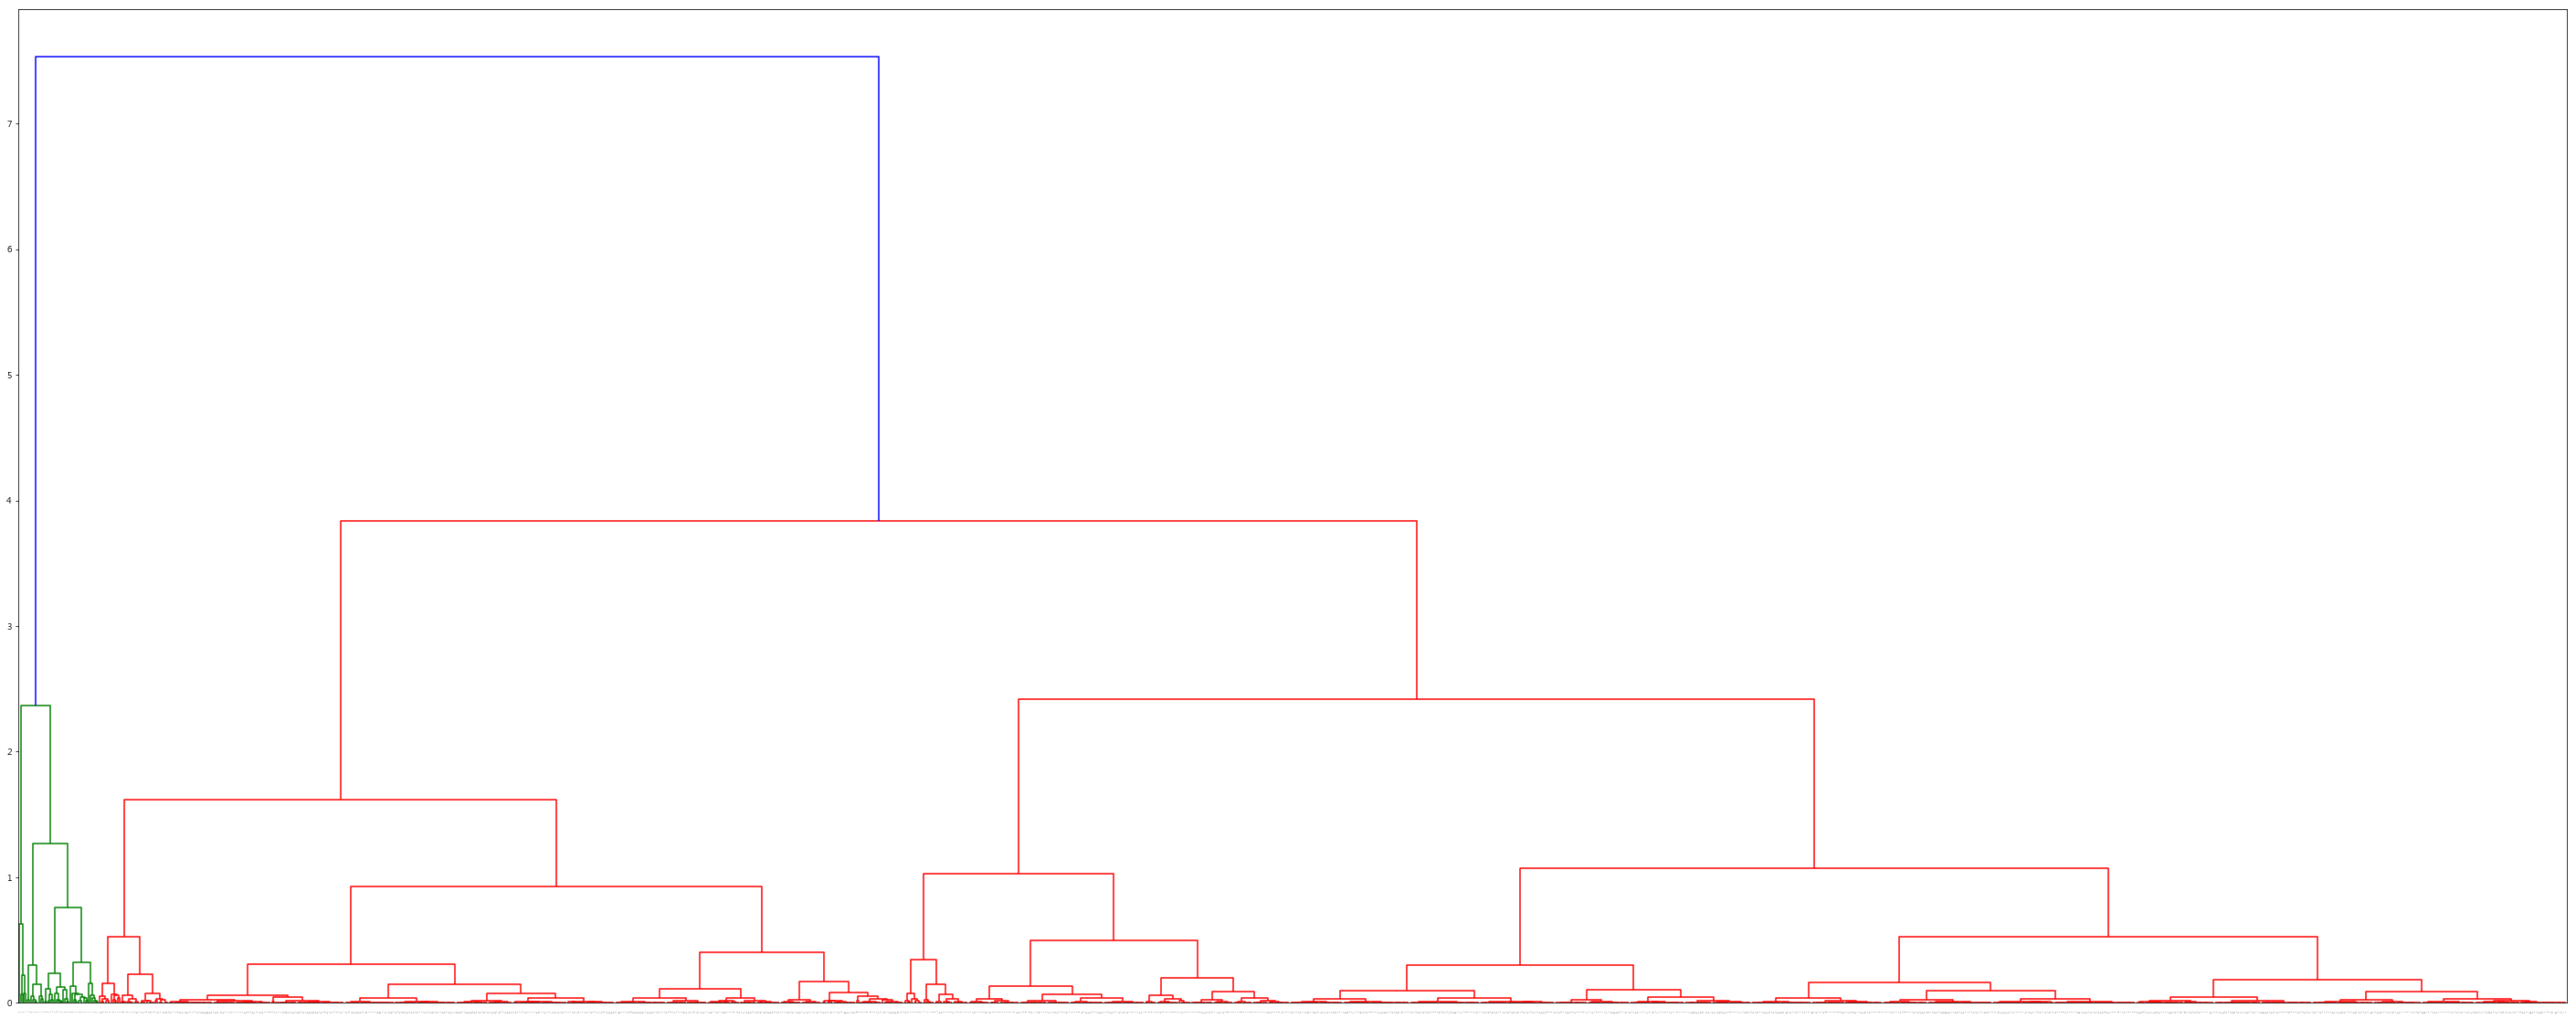

In [61]:
Z = linkage(featureTT2,'ward')

plt.figure(figsize=(50,20))
dendrogram(Z,
           leaf_rotation=100,
           leaf_font_size=1, 
           labels=featureTT2.index)
plt.show()

### k = 2

In [140]:
k=2
featureTT3_3 = featureTT2.copy()

predict = fcluster(Z, k, criterion = 'maxclust')
featureTT3_3['cluster']=predict
traintest4_3 = pd.merge(traintest3, featureTT3_3, on ='variable',how='left')

In [141]:
a_1T3 = traintest4_3[traintest4_3['cluster']==1]
a_2T3 = traintest4_3[traintest4_3['cluster']==2]
a_3T3 = traintest4_3[traintest4_3['cluster']==3]
a_4T3 = traintest4_3[traintest4_3['cluster']==4]
a_5T3 = traintest4_3[traintest4_3['cluster']==5]

In [145]:
np.unique(traintest4_3['cluster'])

array([1, 2], dtype=int32)

In [146]:
cnt_srs_1T3 = a_1T3.groupby('Time')['value'].mean()
cnt_srs_2T3 = a_2T3.groupby('Time')['value'].mean()
cnt_srs_3T3 = a_3T3.groupby('Time')['value'].mean()
cnt_srs_4T3 = a_4T3.groupby('Time')['value'].mean()
cnt_srs_5T3 = a_5T3.groupby('Time')['value'].mean()

In [147]:
import plotly.graph_objs as go
def scatter_plot(cnt_srs, color, showlegend1=False, name1 = ""):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        name = name1,
        showlegend=showlegend1,
        marker=dict(
            color=color,
        ),
    )
    return trace

In [148]:
trace_1T3 = scatter_plot(cnt_srs_1T3, 'yellow', True ,'Cluster_1')
trace_2T3 = scatter_plot(cnt_srs_2T3, 'green', True ,'Cluster_2')
trace_3T3 = scatter_plot(cnt_srs_3T3, 'red', True ,'Cluster_3')
trace_4T3 = scatter_plot(cnt_srs_4T3, 'grey', True ,'Cluster_4')
trace_5T3 = scatter_plot(cnt_srs_5T3, 'white', True ,'Cluster_5')

In [149]:
import plotly.offline as py
layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title='Train Clustering_3'
)

data = [trace_1T3,trace_2T3]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

In [150]:
traintest4_3.groupby('cluster')['variable'].nunique()

cluster
1      47
2    1444
Name: variable, dtype: int64

In [152]:
# TEST에서 각각의 클러스터에 해당하는 ID 추출
c1_testID3 = np.unique(traintest4_3[traintest4_3.cluster==1]['variable'])
c2_testID3 = np.unique(traintest4_3[traintest4_3.cluster==2]['variable'])
c3_testID3 = np.unique(traintest4_3[traintest4_3.cluster==3]['variable'])
c4_testID3 = np.unique(traintest4_3[traintest4_3.cluster==4]['variable'])
c5_testID3 = np.unique(traintest4_3[traintest4_3.cluster==5]['variable'])

In [156]:
test_cluster1_3 = [a for a in c1_testID3 if a in test.columns]
test_cluster2_3 = [a for a in c2_testID3 if a in test.columns]
test_cluster3_3 = [a for a in c3_testID3 if a in test.columns]
test_cluster4_3 = [a for a in c4_testID3 if a in test.columns]
test_cluster5_3 = [a for a in c5_testID3 if a in test.columns]

In [157]:
train_cluster1_3 = [a for a in c1_testID3 if a in train.columns]
train_cluster2_3 = [a for a in c2_testID3 if a in train.columns]
train_cluster3_3 = [a for a in c3_testID3 if a in train.columns]
train_cluster4_3 = [a for a in c4_testID3 if a in train.columns]
train_cluster5_3 = [a for a in c5_testID3 if a in train.columns]

In [158]:
len(test_cluster1_3), len(test_cluster2_3), len(test_cluster3_3),  len(test_cluster4_3),  len(test_cluster5_3)

(20, 180, 0, 0, 0)

In [159]:
len(train_cluster1_3), len(train_cluster2_3), len(train_cluster3_3), len(train_cluster4_3), len(train_cluster5_3)

(27, 1264, 0, 0, 0)

In [162]:
clusterIDs_3 = pd.DataFrame([test_cluster1_3, test_cluster2_3,
                          train_cluster1_3, train_cluster2_3],
            index = ['TEST_Cluster1', 'TEST_Cluster2', 
                    'TRAIN_Cluster1', 'TRAIN_Cluster2'])

In [163]:
clusterIDs_3

0      1      2      3      4      5      6      7      8     \
TEST_Cluster1    X10   X102    X16    X18    X26    X30    X37    X41    X44   
TEST_Cluster2   X105   X106   X107   X110   X111   X116   X120   X123   X124   
TRAIN_Cluster1   X11   X113   X119    X12    X15     X2    X23    X27    X28   
TRAIN_Cluster2  X100  X1000  X1001  X1002  X1003  X1004  X1005  X1006  X1007   

                 9     ...  1254  1255  1256  1257  1258  1259  1260  1261  \
TEST_Cluster1      X5  ...  None  None  None  None  None  None  None  None   
TEST_Cluster2    X125  ...  None  None  None  None  None  None  None  None   
TRAIN_Cluster1    X40  ...  None  None  None  None  None  None  None  None   
TRAIN_Cluster2  X1008  ...  X990  X991  X992  X993  X994  X995  X996  X997   

                1262  1263  
TEST_Cluster1   None  None  
TEST_Cluster2   None  None  
TRAIN_Cluster1  None  None  
TRAIN_Cluster2  X998  X999  

[4 rows x 1264 columns]

In [47]:
clusterIDs_3.to_csv("")

0      1      2      3      4      5      6      7      8     \
TEST_Cluster1    X10   X102   X124    X16    X18    X26    X30    X37    X41   
TEST_Cluster2   X126   X143   X157   X172   X183   X186   X187   X194   X200   
TEST_Cluster3   X105   X106   X107   X110   X111   X116   X120   X123   X125   
TRAIN_Cluster1  None   None   None   None   None   None   None   None   None   
TRAIN_Cluster2  X100  X1000  X1001  X1002  X1003  X1004  X1005  X1006  X1007   
TRAIN_Cluster3  X103   X104    X11   X113   X119    X12  X1486    X15     X2   

                 9     ...  1247  1248  1249  1250  1251  1252  1253  1254  \
TEST_Cluster1     X42  ...  None  None  None  None  None  None  None  None   
TEST_Cluster2    X216  ...  None  None  None  None  None  None  None  None   
TEST_Cluster3    X130  ...  None  None  None  None  None  None  None  None   
TRAIN_Cluster1   None  ...  None  None  None  None  None  None  None  None   
TRAIN_Cluster2  X1008  ...  X990  X991  X992  X993  X994  X995  X996  X997   
TRAIN_Cluster3    X23  ...  None  None  None  None  None  None  None  None   

                1255  1256  
TEST_Cluster1   None  None  
TEST_Cluster2   None  None  
TEST_Cluster3   None  None  
TRAIN_Cluster1  None  None  
TRAIN_Cluster2  X998  X999  
TRAIN_Cluster3  None  None  

[6 rows x 1257 columns]

## K=3 

In [62]:
k=3
featureTT3 = featureTT2.copy()

predict = fcluster(Z, k, criterion = 'maxclust')
featureTT3['cluster']=predict
traintest4 = pd.merge(traintest3, featureTT3, on ='variable',how='left')


In [63]:
a_1T = traintest4[traintest4['cluster']==1]
a_2T = traintest4[traintest4['cluster']==2]
a_3T = traintest4[traintest4['cluster']==3]
a_4T = traintest4[traintest4['cluster']==4]
a_5T = traintest4[traintest4['cluster']==5]

In [64]:
cnt_srs_1T = a_1T.groupby('Time')['value'].mean()
cnt_srs_2T = a_2T.groupby('Time')['value'].mean()
cnt_srs_3T = a_3T.groupby('Time')['value'].mean()
cnt_srs_4T = a_4T.groupby('Time')['value'].mean()
cnt_srs_5T = a_5T.groupby('Time')['value'].mean()

In [66]:
import plotly.graph_objs as go
def scatter_plot(cnt_srs, color, showlegend1=False, name1 = ""):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        name = name1,
        showlegend=showlegend1,
        marker=dict(
            color=color,
        ),
    )
    return trace

In [67]:
trace_1T = scatter_plot(cnt_srs_1T, 'yellow', True ,'Cluster_1')
trace_2T = scatter_plot(cnt_srs_2T, 'green', True ,'Cluster_2')
trace_3T = scatter_plot(cnt_srs_3T, 'red', True ,'Cluster_3')
trace_4T = scatter_plot(cnt_srs_4T, 'grey', True ,'Cluster_4')
trace_5T = scatter_plot(cnt_srs_5T, 'white', True ,'Cluster_5')

In [68]:
import plotly.offline as py
layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title='Train Clustering_3'
)

data = [trace_1T,trace_2T, trace_3T]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

In [70]:
traintest4.groupby('cluster')['variable'].nunique()


cluster
1     47
2    471
3    973
Name: variable, dtype: int64

In [80]:
# TEST에서 각각의 클러스터에 해당하는 ID 추출
c1_testID = np.unique(traintest4[traintest4.cluster==1]['variable'])
c2_testID = np.unique(traintest4[traintest4.cluster==2]['variable'])
c3_testID = np.unique(traintest4[traintest4.cluster==3]['variable'])

In [72]:
test_cluster1 = [a for a in c1_testID if a in test.columns]

In [73]:
test_cluster2 = [a for a in c2_testID if a in test.columns]

In [74]:
test_cluster3 = [a for a in c3_testID if a in test.columns]

In [75]:
train_cluster1 = [a for a in c1_testID if a in train.columns]

In [76]:
train_cluster2 = [a for a in c2_testID if a in train.columns]

In [81]:
train_cluster3 = [a for a in c3_testID if a in train.columns]

In [82]:
len(test_cluster1), len(test_cluster2), len(test_cluster3)

(20, 38, 142)

In [83]:
len(train_cluster1), len(train_cluster2), len(train_cluster3)

(27, 433, 831)

In [84]:
clusterIDs = pd.DataFrame([test_cluster1, test_cluster2, test_cluster3,
                          train_cluster1, train_cluster2, train_cluster3],
            index = ['TEST_Cluster1', 'TEST_Cluster2', 'TEST_Cluster3',
                    'TRAIN_Cluster1', 'TRAIN_Cluster2', 'TRAIN_Cluster3'])

### k = 4

In [86]:
k=4
featureTT3_1 = featureTT2.copy()

predict = fcluster(Z, k, criterion = 'maxclust')
featureTT3_1['cluster']=predict
traintest4_1 = pd.merge(traintest3, featureTT3_1, on ='variable',how='left')

In [87]:
a_1T1 = traintest4_1[traintest4_1['cluster']==1]
a_2T1 = traintest4_1[traintest4_1['cluster']==2]
a_3T1 = traintest4_1[traintest4_1['cluster']==3]
a_4T1 = traintest4_1[traintest4_1['cluster']==4]
a_5T1 = traintest4_1[traintest4_1['cluster']==5]

In [88]:
cnt_srs_1T1 = a_1T1.groupby('Time')['value'].mean()
cnt_srs_2T1 = a_2T1.groupby('Time')['value'].mean()
cnt_srs_3T1 = a_3T1.groupby('Time')['value'].mean()
cnt_srs_4T1 = a_4T1.groupby('Time')['value'].mean()
cnt_srs_5T1 = a_5T1.groupby('Time')['value'].mean()

In [89]:
import plotly.graph_objs as go
def scatter_plot(cnt_srs, color, showlegend1=False, name1 = ""):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        name = name1,
        showlegend=showlegend1,
        marker=dict(
            color=color,
        ),
    )
    return trace

In [90]:
trace_1T1 = scatter_plot(cnt_srs_1T1, 'yellow', True ,'Cluster_1')
trace_2T1 = scatter_plot(cnt_srs_2T1, 'green', True ,'Cluster_2')
trace_3T1 = scatter_plot(cnt_srs_3T1, 'red', True ,'Cluster_3')
trace_4T1 = scatter_plot(cnt_srs_4T1, 'grey', True ,'Cluster_4')
trace_5T1 = scatter_plot(cnt_srs_5T1, 'white', True ,'Cluster_5')

In [91]:
import plotly.offline as py
layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title='Train Clustering_3'
)

data = [trace_1T1,trace_2T1, trace_3T1, trace_4T1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

In [93]:
traintest4_1.groupby('cluster')['variable'].nunique()


cluster
1     47
2    471
3    226
4    747
Name: variable, dtype: int64

In [95]:
# TEST에서 각각의 클러스터에 해당하는 ID 추출
c1_testID1 = np.unique(traintest4_1[traintest4_1.cluster==1]['variable'])
c2_testID1 = np.unique(traintest4_1[traintest4_1.cluster==2]['variable'])
c3_testID1 = np.unique(traintest4_1[traintest4_1.cluster==3]['variable'])
c4_testID1 = np.unique(traintest4_1[traintest4_1.cluster==4]['variable'])

In [98]:
test_cluster1_1 = [a for a in c1_testID1 if a in test.columns]
test_cluster2_1 = [a for a in c2_testID1 if a in test.columns]
test_cluster3_1 = [a for a in c3_testID1 if a in test.columns]
test_cluster4_1 = [a for a in c4_testID1 if a in test.columns]

In [99]:
train_cluster1_1 = [a for a in c1_testID1 if a in train.columns]
train_cluster2_1 = [a for a in c2_testID1 if a in train.columns]
train_cluster3_1 = [a for a in c3_testID1 if a in train.columns]
train_cluster4_1 = [a for a in c4_testID1 if a in train.columns]

In [100]:
len(test_cluster1_1), len(test_cluster2_1), len(test_cluster3_1),  len(test_cluster4_1)

(20, 38, 49, 93)

In [101]:
len(train_cluster1_1), len(train_cluster2_1), len(train_cluster3_1), len(train_cluster4_1)

(27, 433, 177, 654)

In [102]:
clusterIDs_1 = pd.DataFrame([test_cluster1, test_cluster2, test_cluster3,
                          train_cluster1, train_cluster2, train_cluster3],
            index = ['TEST_Cluster1', 'TEST_Cluster2', 'TEST_Cluster3',
                    'TRAIN_Cluster1', 'TRAIN_Cluster2', 'TRAIN_Cluster3'])

In [47]:
clusterIDs.to_csv("")

0      1      2      3      4      5      6      7      8     \
TEST_Cluster1    X10   X102   X124    X16    X18    X26    X30    X37    X41   
TEST_Cluster2   X126   X143   X157   X172   X183   X186   X187   X194   X200   
TEST_Cluster3   X105   X106   X107   X110   X111   X116   X120   X123   X125   
TRAIN_Cluster1  None   None   None   None   None   None   None   None   None   
TRAIN_Cluster2  X100  X1000  X1001  X1002  X1003  X1004  X1005  X1006  X1007   
TRAIN_Cluster3  X103   X104    X11   X113   X119    X12  X1486    X15     X2   

                 9     ...  1247  1248  1249  1250  1251  1252  1253  1254  \
TEST_Cluster1     X42  ...  None  None  None  None  None  None  None  None   
TEST_Cluster2    X216  ...  None  None  None  None  None  None  None  None   
TEST_Cluster3    X130  ...  None  None  None  None  None  None  None  None   
TRAIN_Cluster1   None  ...  None  None  None  None  None  None  None  None   
TRAIN_Cluster2  X1008  ...  X990  X991  X992  X993  X994  X995  X996  X997   
TRAIN_Cluster3    X23  ...  None  None  None  None  None  None  None  None   

                1255  1256  
TEST_Cluster1   None  None  
TEST_Cluster2   None  None  
TEST_Cluster3   None  None  
TRAIN_Cluster1  None  None  
TRAIN_Cluster2  X998  X999  
TRAIN_Cluster3  None  None  

[6 rows x 1257 columns]

### k = 5

In [112]:
k=5
featureTT3_2 = featureTT2.copy()

predict = fcluster(Z, k, criterion = 'maxclust')
featureTT3_2['cluster']=predict
traintest4_2 = pd.merge(traintest3, featureTT3_2, on ='variable',how='left')

In [113]:
a_1T2 = traintest4_2[traintest4_2['cluster']==1]
a_2T2 = traintest4_2[traintest4_2['cluster']==2]
a_3T2 = traintest4_2[traintest4_2['cluster']==3]
a_4T2 = traintest4_2[traintest4_2['cluster']==4]
a_5T2 = traintest4_2[traintest4_2['cluster']==5]

In [114]:
np.unique(traintest4_2['cluster'])

array([1, 2, 3, 4, 5], dtype=int32)

In [115]:
cnt_srs_1T2 = a_1T2.groupby('Time')['value'].mean()
cnt_srs_2T2 = a_2T2.groupby('Time')['value'].mean()
cnt_srs_3T2 = a_3T2.groupby('Time')['value'].mean()
cnt_srs_4T2 = a_4T2.groupby('Time')['value'].mean()
cnt_srs_5T2 = a_5T2.groupby('Time')['value'].mean()

In [116]:
import plotly.graph_objs as go
def scatter_plot(cnt_srs, color, showlegend1=False, name1 = ""):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        name = name1,
        showlegend=showlegend1,
        marker=dict(
            color=color,
        ),
    )
    return trace

In [117]:
trace_1T2 = scatter_plot(cnt_srs_1T2, 'yellow', True ,'Cluster_1')
trace_2T2 = scatter_plot(cnt_srs_2T2, 'green', True ,'Cluster_2')
trace_3T2 = scatter_plot(cnt_srs_3T2, 'red', True ,'Cluster_3')
trace_4T2 = scatter_plot(cnt_srs_4T2, 'grey', True ,'Cluster_4')
trace_5T2 = scatter_plot(cnt_srs_5T2, 'white', True ,'Cluster_5')

In [118]:
import plotly.offline as py
layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title='Train Clustering_3'
)

data = [trace_1T2,trace_2T2, trace_3T2, trace_4T2,trace_5T2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

In [123]:
traintest4_2.groupby('cluster')['variable'].nunique()

cluster
1      5
2     42
3    471
4    226
5    747
Name: variable, dtype: int64

In [128]:
# TEST에서 각각의 클러스터에 해당하는 ID 추출
c1_testID2= np.unique(traintest4_2[traintest4_2.cluster==1]['variable'])
c2_testID2 = np.unique(traintest4_2[traintest4_2.cluster==2]['variable'])
c3_testID2 = np.unique(traintest4_2[traintest4_2.cluster==3]['variable'])
c4_testID2 = np.unique(traintest4_2[traintest4_2.cluster==4]['variable'])
c5_testID2 = np.unique(traintest4_2[traintest4_2.cluster==5]['variable'])

In [129]:
test_cluster1_2 = [a for a in c1_testID2 if a in test.columns]
test_cluster2_2 = [a for a in c2_testID2 if a in test.columns]
test_cluster3_2 = [a for a in c3_testID2 if a in test.columns]
test_cluster4_2 = [a for a in c4_testID2 if a in test.columns]
test_cluster5_2 = [a for a in c5_testID2 if a in test.columns]

In [130]:
train_cluster1_2 = [a for a in c1_testID2 if a in train.columns]
train_cluster2_2 = [a for a in c2_testID2 if a in train.columns]
train_cluster3_2 = [a for a in c3_testID2 if a in train.columns]
train_cluster4_2 = [a for a in c4_testID2 if a in train.columns]
train_cluster5_2 = [a for a in c5_testID2 if a in train.columns]

In [136]:
len(test_cluster1_2), len(test_cluster2_2), len(test_cluster3_2),  len(test_cluster4_2),  len(test_cluster5_2)

(3, 17, 38, 49, 93)

In [137]:
len(train_cluster1_2), len(train_cluster2_2), len(train_cluster3_2), len(train_cluster4_2), len(train_cluster5_2)

(2, 25, 433, 177, 654)

In [139]:
clusterIDs_2 = pd.DataFrame([test_cluster1_2, test_cluster2_2, test_cluster3_2,test_cluster4_2, test_cluster5_2,
                          train_cluster1_2, train_cluster2_2, train_cluster3_2, train_cluster4_2, train_cluster5_2],
            index = ['TEST_Cluster1', 'TEST_Cluster2', 'TEST_Cluster3','TEST_Cluster4','TEST_Cluster4',
                    'TRAIN_Cluster1', 'TRAIN_Cluster2', 'TRAIN_Cluster3', 'TRAIN_Cluster4', 'TRAIN_Cluster5'])

In [47]:
clusterIDs.to_csv("")

0      1      2      3      4      5      6      7      8     \
TEST_Cluster1    X10   X102   X124    X16    X18    X26    X30    X37    X41   
TEST_Cluster2   X126   X143   X157   X172   X183   X186   X187   X194   X200   
TEST_Cluster3   X105   X106   X107   X110   X111   X116   X120   X123   X125   
TRAIN_Cluster1  None   None   None   None   None   None   None   None   None   
TRAIN_Cluster2  X100  X1000  X1001  X1002  X1003  X1004  X1005  X1006  X1007   
TRAIN_Cluster3  X103   X104    X11   X113   X119    X12  X1486    X15     X2   

                 9     ...  1247  1248  1249  1250  1251  1252  1253  1254  \
TEST_Cluster1     X42  ...  None  None  None  None  None  None  None  None   
TEST_Cluster2    X216  ...  None  None  None  None  None  None  None  None   
TEST_Cluster3    X130  ...  None  None  None  None  None  None  None  None   
TRAIN_Cluster1   None  ...  None  None  None  None  None  None  None  None   
TRAIN_Cluster2  X1008  ...  X990  X991  X992  X993  X994  X995  X996  X997   
TRAIN_Cluster3    X23  ...  None  None  None  None  None  None  None  None   

                1255  1256  
TEST_Cluster1   None  None  
TEST_Cluster2   None  None  
TEST_Cluster3   None  None  
TRAIN_Cluster1  None  None  
TRAIN_Cluster2  X998  X999  
TRAIN_Cluster3  None  None  

[6 rows x 1257 columns]